## Actividad ##

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('DataSets/auto-mpg.csv')
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     406 non-null    int64  
 2   displacement  406 non-null    float64
 3   horsepower    400 non-null    float64
 4   weight        406 non-null    int64  
 5   acceleration  406 non-null    float64
 6   model year    406 non-null    int64  
 7   origin        406 non-null    int64  
 8   car name      406 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.7+ KB


In [4]:
data.isnull().sum()

mpg             8
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [5]:
data = data.dropna(axis = 0, how = 'any')

In [6]:
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
401,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
402,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
403,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
404,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


In [7]:
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [8]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


<Axes: ylabel='count'>

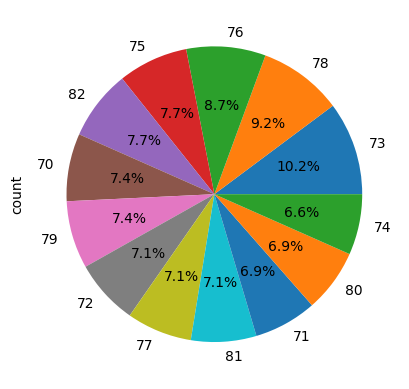

In [9]:
data['model year'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%')

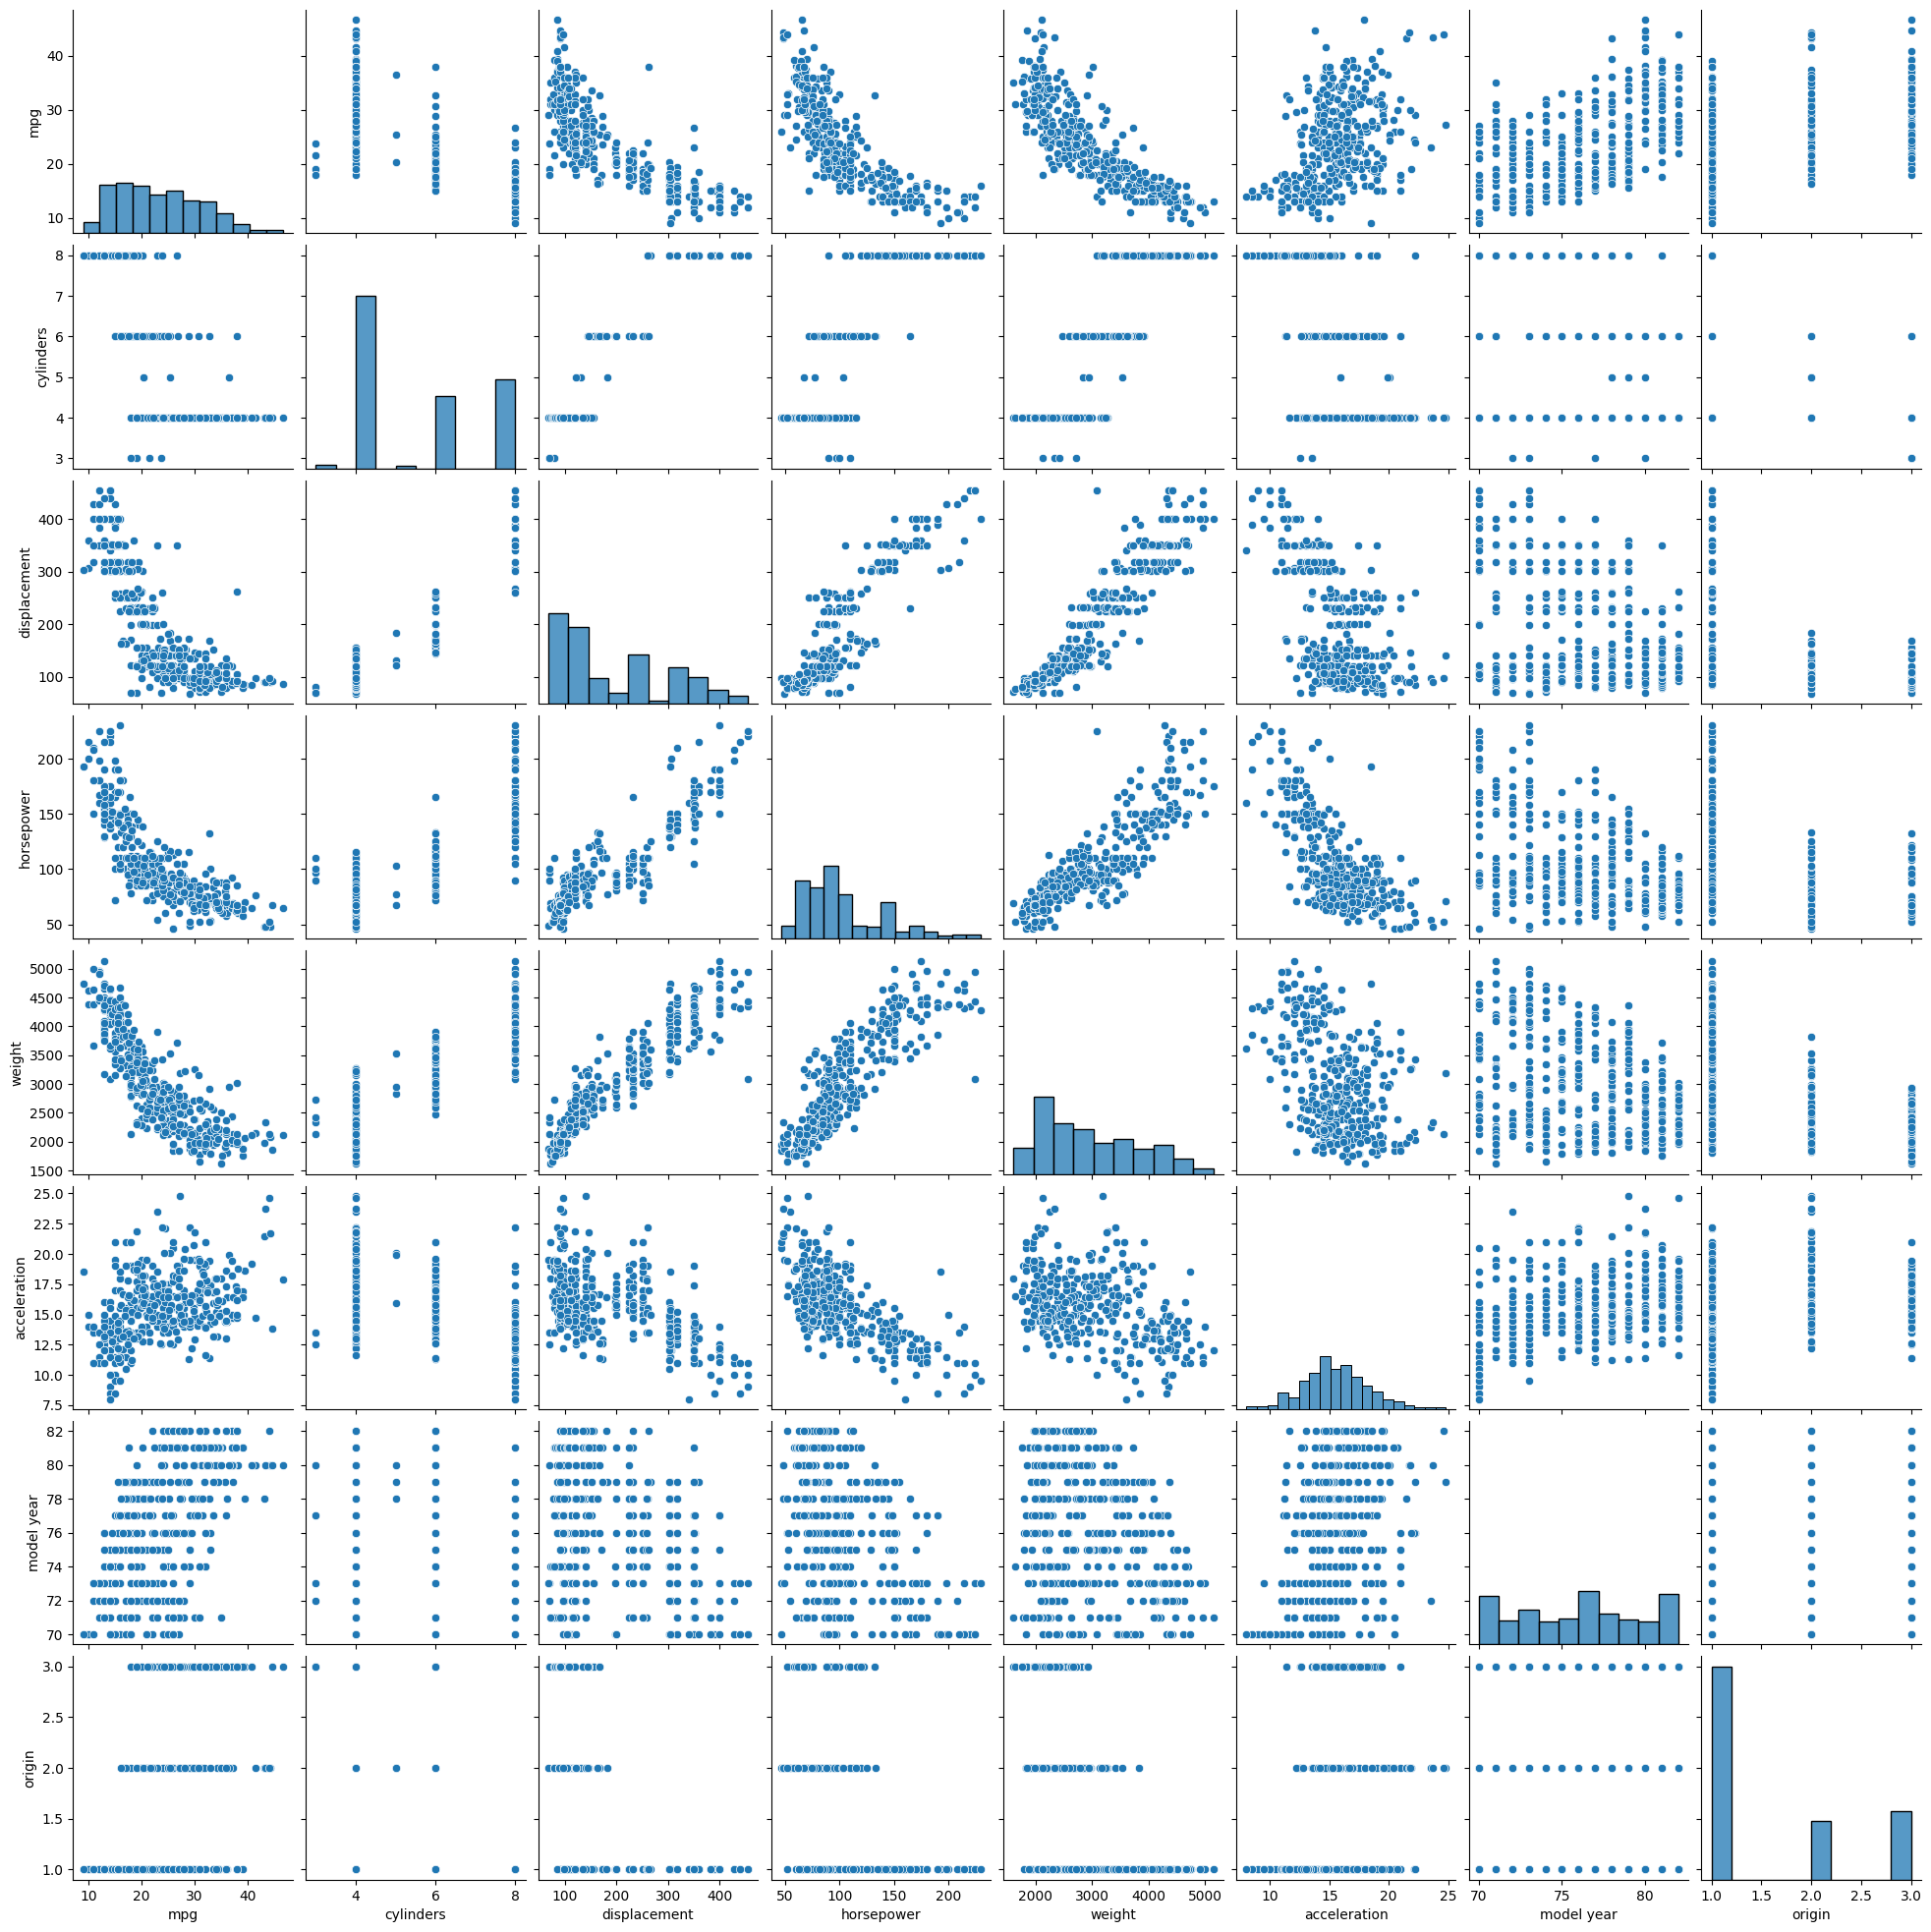

In [10]:
sns.pairplot(data)

In [11]:
data = data.drop(['origin', 'car name', 'model year', 'cylinders'], axis = 1)

In [12]:
data.head()

,mpg,displacement,horsepower,weight,acceleration
0,18.0,307.0,130.0,3504,12.0
1,15.0,350.0,165.0,3693,11.5
2,18.0,318.0,150.0,3436,11.0
3,16.0,304.0,150.0,3433,12.0
4,17.0,302.0,140.0,3449,10.5


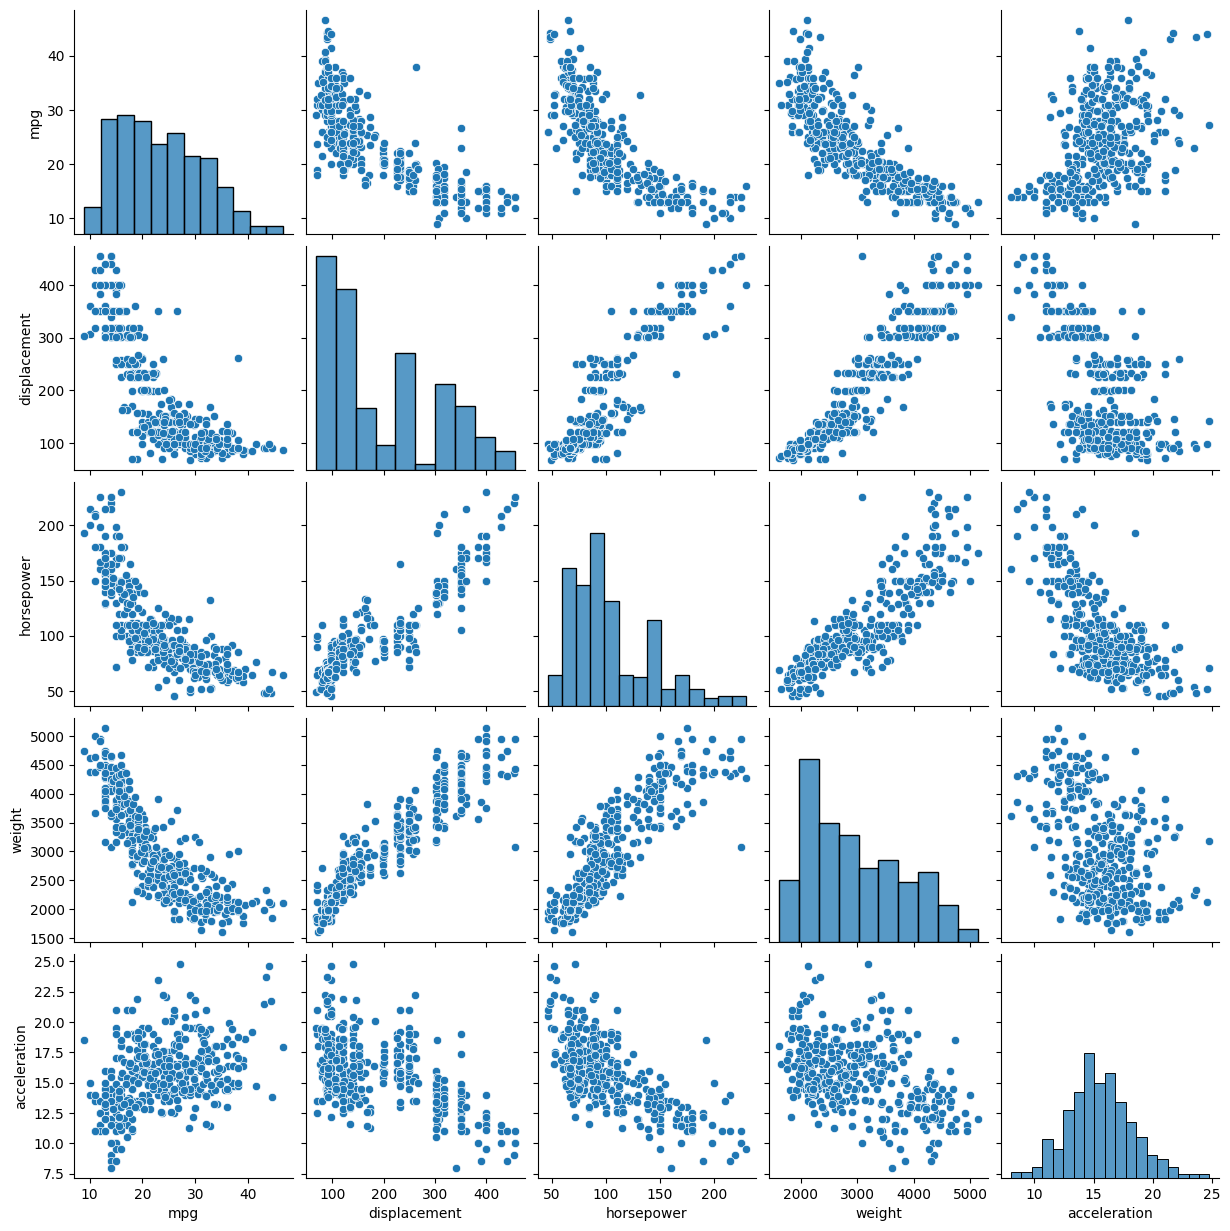

In [13]:
sns.pairplot(data)

In [14]:
correlation = data.corr()

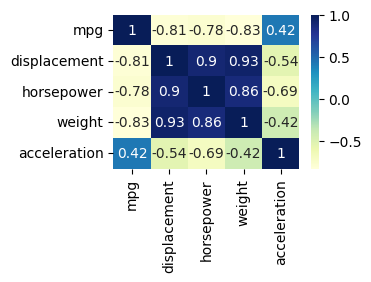

In [15]:
plt.figure(figsize = (3,2))
sns.heatmap(correlation, annot = True, cmap = 'YlGnBu')
plt.show()

In [16]:
_list = [x for x in data.columns if x != 'displacement']

In [17]:
_list

['mpg', 'horsepower', 'weight', 'acceleration']

In [18]:
x = np.array(data[_list])
y = np.array(data['displacement'])

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
lr = LinearRegression()

In [23]:
lr.fit(x_train, y_train)

LinearRegression()

In [24]:
print(f'El Bias es: {(lr.intercept_)}, mientras que el peso de t es: {(lr.coef_)}')

El Bias es: -24.978846152789004, mientras que el peso de t es: [-0.69956888  0.54128657  0.08178305 -4.21897903]


In [25]:
y_pred = lr.predict(x_test)

In [26]:
y_pred

array([106.88829984, 147.85062412, 337.83408351, 398.390999  ,
       130.18403784, 354.15205673, 295.14939633, 180.93669179,
       423.13735111, 137.32111543, 272.13555701, 115.37625821,
       301.87795425,  48.97782543,  72.15585737, 298.20928175,
       389.09179478,  49.37369985,  46.7285183 , 180.57751844,
       311.28300518, 289.5097368 , 169.66377257, 310.65061106,
        73.2202121 , 348.1365895 , 187.09649821, 170.4186679 ,
       361.57153796,  42.48279874, 180.34761115, 405.51159783,
       275.15450515, 323.44620984, 320.78397006, 140.35843787,
       201.74750431, 231.52158621, 239.07242581, 176.4278327 ,
       162.57281643, 176.75827836, 174.21660001, 226.3212878 ,
       252.45990569, 325.41583701, 323.29029386,  79.51346427,
       112.02942137, 168.78375859,  80.10954366, 326.55682707,
        51.67556449,  60.71336045, 406.716881  , 353.97101917,
       186.04332861, 207.98876913, 162.53959124, 157.74777545,
       278.21969558, 383.71707015, 315.71739352, 222.75

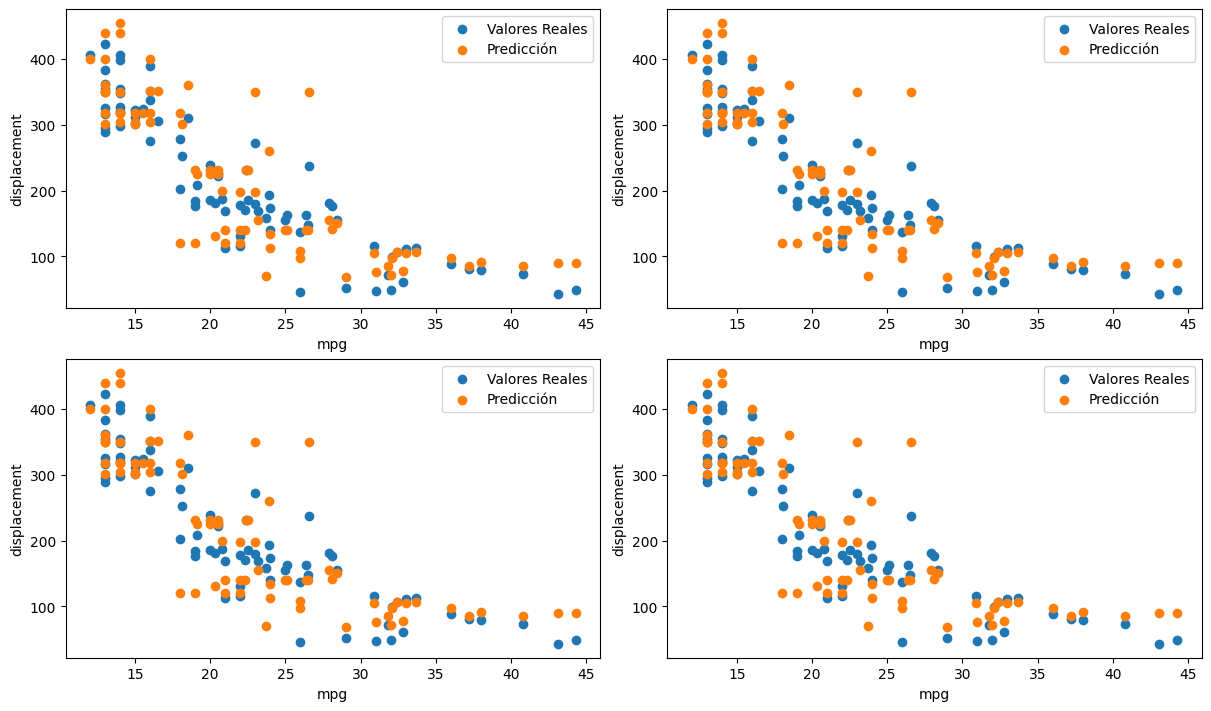

In [35]:
fig, ax = plt.subplots(2, 2, figsize = (12, 7), layout = 'constrained')

i_temp = 0
j_temp = 0

for i  in range(len(_list)):
    
    if i <= (len(_list)/2) - 1:
        i_temp = np.copy(i)
        
    if i > (len(_list)/2) - 1:
        i_temp = np.copy(i - 2)
        j_temp = 1

    ax[i_temp, j_temp].scatter(x_test[:, 0], y_pred, label = 'Valores Reales')
    ax[i_temp, j_temp].scatter(x_test[:, 0], y_test, label = 'Predicción')
    ax[i_temp, j_temp].set_xlabel(_list[0])
    ax[i_temp, j_temp].set_ylabel('displacement')
    ax[i_temp, j_temp].legend()


plt.show()

/tmp/ipykernel_7460/3294526370.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


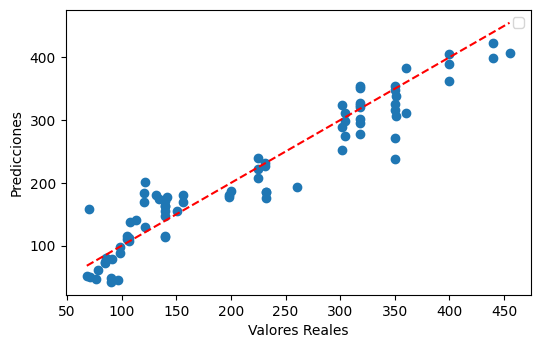

In [28]:
plt.figure(figsize = (6,3.7))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = 'Red', ls = '--')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.legend()

plt.show()

In [29]:
from sklearn.metrics import r2_score, mean_squared_error

In [30]:
r2_score(y_test, y_pred)

0.9047736630666735

In [32]:
np.sqrt(mean_squared_error(y_test, y_pred))

np.float64(34.70523428730672)